In [24]:
import yfinance as yf
import pandas as pd
import time
from datetime import datetime, timedelta
import os

# Parameters
default_start_date = datetime(2013, 1, 1)
end_date = datetime.today()
chunk_size_days = 90
ticker = "^GSPC"
output_file = "sp500_bulk_data.csv"

# Determine starting point
if os.path.exists(output_file) and os.path.getsize(output_file) > 0:
    try:
        existing_df = pd.read_csv(output_file, parse_dates=["Date"])
        last_date = existing_df["Date"].max()
        start_date = last_date + timedelta(days=1)
        print(f"üìÅ Continuing from last date in file: {last_date.date()} ‚Üí Start from: {start_date.date()}")
    except Exception as e:
        print(f"‚ö†Ô∏è Error reading file. Starting fresh: {e}")
        start_date = default_start_date
else:
    print("üÜï No existing file or empty file. Starting fresh.")
    start_date = default_start_date

# Main download loop with retry logic
current = start_date
first_chunk = not os.path.exists(output_file)

while current < end_date:
    chunk_end = min(current + timedelta(days=chunk_size_days), end_date)
    print(f"‚è≥ Downloading from {current.date()} to {chunk_end.date()}")

    retries = 3
    delay = 10  # initial delay in seconds for retrying

    for attempt in range(retries):
        try:
            df = yf.download(
                ticker,
                start=current.strftime("%Y-%m-%d"),
                end=chunk_end.strftime("%Y-%m-%d"),
                interval="1d",
                progress=False
            )

            if not df.empty:
                df.reset_index(inplace=True)
                df.columns.name = None
                df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]

                df.to_csv(output_file, mode="a", index=False, header=first_chunk)
                first_chunk = False
                print(f"‚úÖ Saved {len(df)} rows.")
                break  # successful download, exit retry loop
            else:
                print("‚ö†Ô∏è No data returned for this chunk.")
                break  # no point retrying, exit retry loop

        except Exception as e:
            print(f"‚ùå Error downloading (Attempt {attempt+1}/{retries}): {e}")
            if attempt < retries - 1:
                print(f"‚è≥ Retrying after {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # exponential backoff
            else:
                print("‚ö†Ô∏è Maximum retries reached. Skipping this chunk.")

    current = chunk_end
    time.sleep(10)  # additional waiting between chunks to prevent further rate limiting

print("üéâ All chunks downloaded and saved to:", output_file)

üìÅ Continuing from last date in file: 2025-05-29 ‚Üí Start from: 2025-05-30
‚è≥ Downloading from 2025-05-30 to 2025-05-31
‚úÖ Saved 1 rows.
üéâ All chunks downloaded and saved to: sp500_bulk_data.csv


In [3]:
data = pd.read_csv("sp500_bulk_data.csv", index_col=0, parse_dates=True)
data = data.iloc[1:]  # Drop junk row

data.to_csv("sp500_bulk_data.csv")

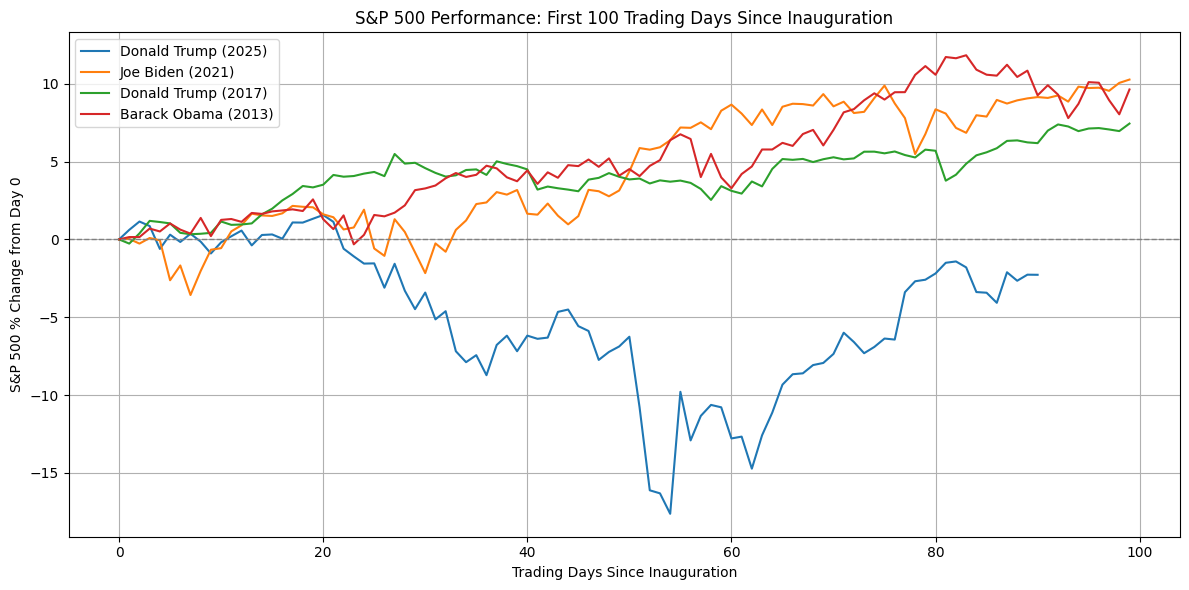

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV and ensure datetime index
data = pd.read_csv("sp500_bulk_data.csv", index_col=0, parse_dates=True)
data.index = pd.to_datetime(data.index)  # üîß FIX: make index datetime

# Inauguration dates of last 4 presidents
inauguration_dates = {
    "Donald Trump (2025)": "2025-01-20",
    "Joe Biden (2021)": "2021-01-20",
    "Donald Trump (2017)": "2017-01-20",
    "Barack Obama (2013)": "2013-01-20"
}

# Get 100 trading days of data starting from a given inauguration date
def get_sp500_data_from_csv(start_date, days=100):
    start = pd.to_datetime(start_date)
    df_slice = data.loc[start:].head(days).copy()
    df_slice['Pct Change'] = (df_slice['Close'] / df_slice['Close'].iloc[0] - 1) * 100
    df_slice.reset_index(inplace=True)
    return df_slice

# Get the data for each president
sp500_dfs = {
    president: get_sp500_data_from_csv(date)
    for president, date in inauguration_dates.items()
}

# Plotting
plt.figure(figsize=(12, 6))
for president, df in sp500_dfs.items():
    plt.plot(range(len(df)), df['Pct Change'], label=president)  # X-axis is day count

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("S&P 500 Performance: First 100 Trading Days Since Inauguration")
plt.xlabel("Trading Days Since Inauguration")
plt.ylabel("S&P 500 % Change from Day 0")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


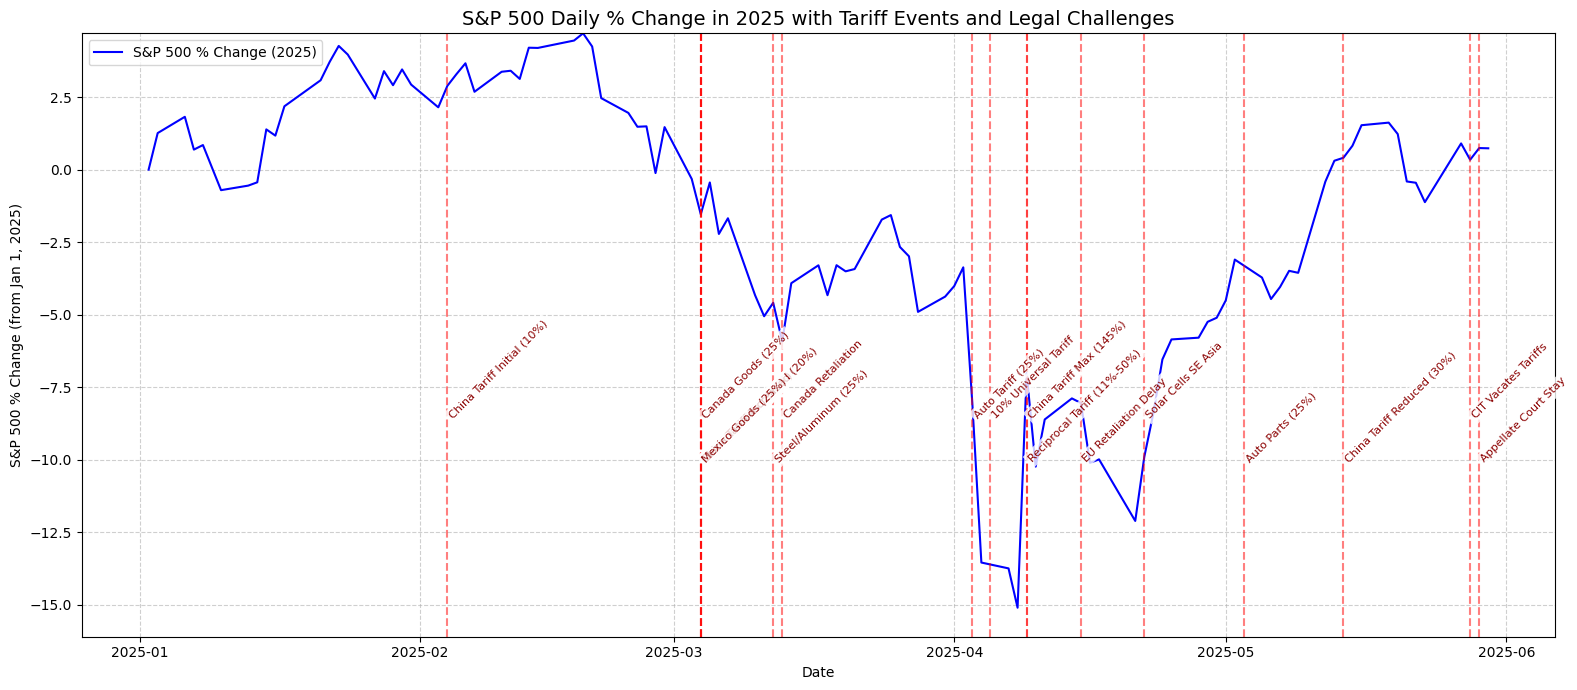

In [26]:
# Filter data for 2025 only
sp500_2025 = data[(data.index >= "2025-01-01") & (data.index <= "2025-12-31")].copy()
sp500_2025['Pct Change'] = (sp500_2025['Close'] / sp500_2025['Close'].iloc[0] - 1) * 100

# Updated and detailed Tariff events with court challenge information
tariff_events = [
    {"label": "Steel/Aluminum (25%)", "date": "2025-03-12"},
    {"label": "Auto Tariff (25%)", "date": "2025-04-03"},
    {"label": "Auto Parts (25%)", "date": "2025-05-03"},
    {"label": "10% Universal Tariff", "date": "2025-04-05"},
    {"label": "Reciprocal Tariff (11%-50%)", "date": "2025-04-09"},
    {"label": "Canada Goods (25%)", "date": "2025-03-04"},
    {"label": "Canada Oil/Gas (10%)", "date": "2025-03-04"},
    {"label": "China Tariff Initial (10%)", "date": "2025-02-04"},
    {"label": "China Tariff Increased (20%)", "date": "2025-03-04"},
    {"label": "China Tariff Max (145%)", "date": "2025-04-09"},
    {"label": "Mexico Goods (25%)", "date": "2025-03-04"},
    {"label": "Solar Cells SE Asia", "date": "2025-04-22"},
    {"label": "China Tariff Reduced (30%)", "date": "2025-05-14"},
    {"label": "Canada Retaliation", "date": "2025-03-13"},
    {"label": "EU Retaliation Delay", "date": "2025-04-15"},
    {"label": "CIT Vacates Tariffs", "date": "2025-05-28"},
    {"label": "Appellate Court Stay", "date": "2025-05-29"}
]

# Convert string dates to datetime
for event in tariff_events:
    event["datetime"] = pd.to_datetime(event["date"])

# Plot the S&P 500 percentage change
plt.figure(figsize=(16, 7))
plt.plot(sp500_2025.index, sp500_2025['Pct Change'], label="S&P 500 % Change (2025)", color="blue")

# Enhanced label placement at about 25% above the bottom of the plot
plot_range = sp500_2025['Pct Change'].max() - sp500_2025['Pct Change'].min()
y_min = sp500_2025['Pct Change'].min()
offset_base = y_min + 0.25 * plot_range
offsets = [offset_base + (i % 2) * 1.5 for i in range(len(tariff_events))]

for i, event in enumerate(tariff_events):
    if sp500_2025.index.min() <= event["datetime"] <= sp500_2025.index.max():
        plt.axvline(event["datetime"], color='red', linestyle='--', alpha=0.5)
        plt.text(
            event["datetime"],
            offsets[i],
            event["label"],
            rotation=45,
            ha='left',
            va='bottom',
            fontsize=8,
            color='darkred',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
        )

# Adjust plot limits to accommodate labels
plt.ylim(y_min - 1, sp500_2025['Pct Change'].max())

# Formatting
plt.title("S&P 500 Daily % Change in 2025 with Tariff Events and Legal Challenges", fontsize=14)
plt.xlabel("Date")
plt.ylabel("S&P 500 % Change (from Jan 1, 2025)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(loc="upper left")

plt.show()